<center> <h2> Introduction to graphical models : LAB 1 </h2> </center>


<center> <h2> Done by : Mohamed Rostom GHARBI </h2> </center>

**Imports and configuration :**

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
# to embed figures in the notebook
%matplotlib inline
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

**Question 0 :**

<div class="alert alert-info" role="alert">
    
    <b>Comments</b>:
    

$s = log\sum_{i=1}^{I} exp(v_i) $, where each $v_i$ < 0 and $|v_i|$ is very large.
We have $$ v_{max} = \max_{i} v_i $$

Then, we can write : 

$$
log\sum_{i=1}^{I} exp(v_i) = log(\sum_{i} exp(v_i - v_{max} + v_{max}))
$$
$$
 = log(\sum_{i} exp(v_i - v_{max} * exp(v_{max})))
$$
$$
 = v_{max} + log(\sum_{i} exp(v_i - v_{max})) 
$$
With $ \sum_{i} exp(v_i - v_{max}) \geq I $, because for i0 where $ v_{i0} = v_{max} $, we will have exp ( vmax - vmax ), which will get us the value 1, and then for the other values of i we will have some terms whose values are below 1 but positive. 


</div>

In [2]:
def sum_log_exp (v):
    
    vmax = np.max(v)
    return (vmax+np.log(np.sum(np.exp(v-vmax))))

In [3]:
v = [ -1234 , -1235 ]
sum_log_exp(v)

-1233.6867383124818

<div class="alert alert-info" role="alert">

<b> Interpretation : </b> 
    
    We can see that now the machine is able to compute the sum without problems.
   
    
</div>

In [4]:
np.log(np.sum(np.exp(v)))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

<div class="alert alert-info" role="alert">

<b> Interpretation : </b> 
    
    We can see here that without a such configuration, we would have '-inf', since the $V_{i}$ are very small. 
   
    
</div>

**Question 1 :**

<div class="alert alert-danger">
Choose the appropriate random variables, define their domains, write down the generative model and draw the
associated directed graphical model.

<div class="alert alert-info" role="alert">

For this question, we will be defining 2 random variables.

First we define X :
- $X_{t}$= The true position of the robot at step t, in other words, it's the latent state.  <br>
 $X_{t} \in \{1,,N\}$ where N is the number of possible locations  <br>

- $Y_{t}$= The observed position of the robot at step t. In other words, the observation.  <br>
$Y_{t} \in \{1,,N\}$ <br>


So we have : 
- $ P \left( Y_k \vert X_k \right) = w $ : <b> Observation Model </b>  <br>
- $ P \left( X_k \vert X_{k-1} \right) = \epsilon $ : <b> Transition Model </b> 

</div>

<center> <b> For this, we will have an example with N equal to 10. </b> </center>

In [5]:
N = 10

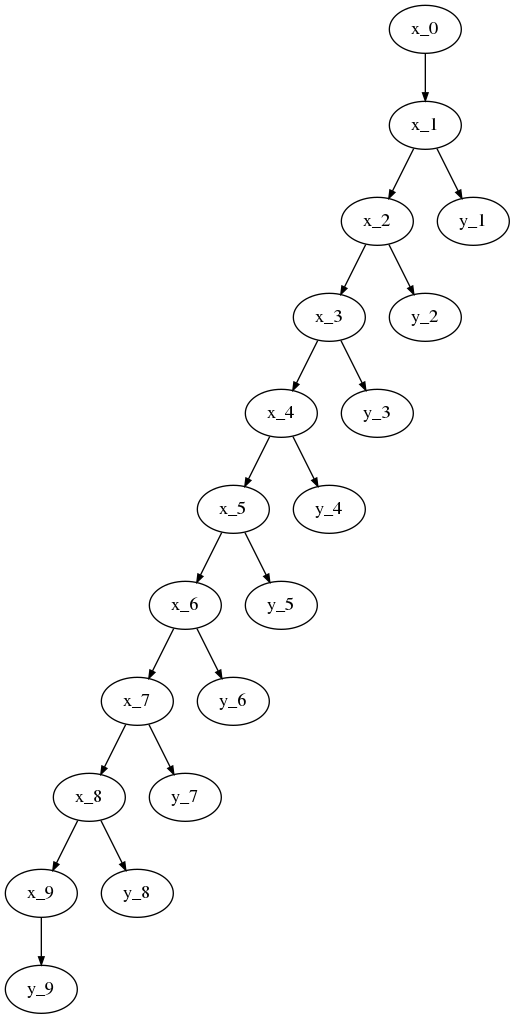

In [6]:
edges = [(i,i+1,{"rep":"P(X_" + str(i) + "|X_" +str(i+1) + ")" }) for i in range(N-1)]
edges = edges + [(i+1,i+1+N,{"rep":"P(Y_" + str(i-1) + "|X_" +str(i-1) + ")" }) for i in range(N-1)]

labels = {i : "x_"+str(i) for i in range(0,N+1)}
labels.update({i : "y_"+str(i-N) for i in range(N+1,2*N+1)})

hmm = nx.MultiDiGraph(edges)
hmm = nx.relabel_nodes(hmm, labels)
hmm.graph['edge'] = {'arrowsize': '0.6', 'splines': 'polyline'}
hmm.graph['graph'] = {'scale': '5'}

M = to_agraph(hmm) 
M.layout('dot')                                                                 
M.draw("HMM.png")
Image("HMM.png")

**In other words, we can also express it as follows :**

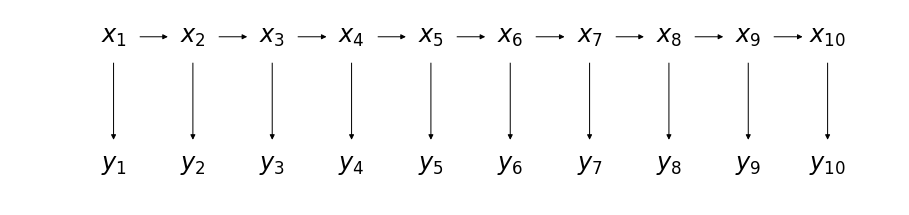

In [7]:

def makeDBN(inter, intra, T, labels):
    """Unfold a graph for T time slices"""
    N = max(max([i for i,j in inter]),max([j for i,j in inter]))+1

    G = np.zeros((N*T,N*T))
    pos = []
    all_labels = []
    for n in range(N):
        pos.append((0,-n))
        all_labels.append('$'+labels[n]+'_{'+str(0+1)+"}"+'$')
        
    for e in inter:
        s,d = e
        G[s,d] = 1

    for t in range(1,T):
        for n in range(N):
            pos.append((t,-n))
            all_labels.append('$'+labels[n]+'_{'+str(t+1)+"}"+'$')

        for e in inter:
            s,d = e
            s = s + N*t
            d = d + N*t
            G[s,d] = 1
        
        for e in intra:
            s,d = e
            s = s + N*(t-1)
            d = d + N*t
            G[s,d] = 1
    return G,pos,all_labels

#inter = [(0,1),(1,2),(2,3)]
#intra = [(0,0),(1,1),(0,1),(0,2)]
#variable_names = ["r","z","x", "y"] 
inter = [(0,1)]
intra = [(0,0)]
variable_names = ["x", "y"] 
N = 10

A, pos, label_list = makeDBN(inter, intra, N, variable_names)

G = nx.DiGraph(A)
labels = {i: s for i,s in enumerate(label_list)}
plt.figure(figsize=(12,2.5))
nx.draw(G, pos, node_color="white", node_size=2500, labels=labels, font_size=24, arrows=True)
#nx.draw_graphviz(G,node_size=500, labels=labels, font_size=24, arrows=True)
plt.show()


<h20> [1] Reference : Ali Taylan Cemgil's work </h20>

**Question 2 :**

<div class="alert alert-info" role="alert">
We know that ** $\epsilon$ **  is the probability that the robot stays in the same place at each step k. <br>


We define the transition model as follow :  
$X_t|X_{t-1}$ : $ p(X_t|X_{t-1})$
$$A = \quad
\begin{bmatrix} 
\epsilon & 1-\epsilon & 0 & . & . & . & 0 \\
0 & \epsilon & 1-\epsilon & . & . & . & 0 \\
0 & 0 & \epsilon & 1-\epsilon & . & . & 0 \\
0 & 0 & 0 & \epsilon  & . & . & 0\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&1-\epsilon\\
1-\epsilon & . &.&.&0 & 0&\epsilon
\end{bmatrix} \in R^{NxN}$$

</div>

<div class="alert alert-info" role="alert">

**Explanation :** As explained in the LAB, the robot stays where it is with probability $\epsilon$, or moves to the next point in counter-clock direction with probability
$ 1 − \epsilon $. <br>

On the other hand, we know that for the Transition matrix, the value of $A_{21}$ is where we move from state 2 to state 1, which is possible since the robots moves counter-clock direction.  

</div>

<div class="alert alert-info" role="alert">
We know also that w is the probability that the robot can observe it's true position at step k. <br>

We define the observation model $y_k \sim p(y_k |x_{k})$ as follow : 

</br>
$$\quad
P(Y_{t}|X_{t})=
\begin{bmatrix} 
\omega+\frac{1-\omega}{n} & \frac{1-\omega}{n} & \frac{1-\omega}{n} & . & . & . & \frac{1-\omega}{n} \\
\frac{1-\omega}{n} & \omega+\frac{1-\omega}{n} & \frac{1-\omega}{n} & . & . & . & \frac{1-\omega}{n} \\
\frac{1-\omega}{n} &\frac{1-\omega}{n} & 1+\frac{1-\omega}{n} & 0 & . & . & \frac{1-\omega}{n} \\
\frac{1-\omega}{n} & \frac{1-\omega}{n} &\frac{1-\omega}{n} & \omega+\frac{1-\omega}{n}  & . & . & \frac{1-\omega}{n}\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
\frac{1-\omega}{n} & . &.&.&0&\frac{1-\omega}{n}&\omega+\frac{1-\omega}{n}
\end{bmatrix} \in R^{NxN}$$

</div>

<div class="alert alert-info" role="alert">
**Explanation :** As explained here in the LAB, At each step k, the robot can observe its true position with probability w. With probability 1 − w, the position sensor fails and gives a measurement that is independent from the true position (uniformly distributed).

For example, in $A_{11}$, we have it equal to $\omega+\frac{1-\omega}{n}$, which means it is the probability that wether we got our observation right, OR we get it wrong but we choose somehow the right position, since they are uniformly distributed. 
</div>

In [8]:
def matrix_A(N,eps):
    A=np.eye(N)*eps
    A[0,N-1]=1-eps
    for i in range(1,N):
        A[i,i-1]=1-eps
    return A.T #Because here, the column is fix
        
def matrix_C(N,w):
    return w*np.eye(N)+(1-w)/N*np.full((N,N), 1) #See hint in the next interpretation.

<div class="alert alert-info" role="alert">
**Hint :** 

The secret here is that we write the observation model matrix using this way : 

$$P(Y_{t}|X_{t})= I_N*\omega+\frac{1-\omega}{N}*u_N  $$
where 

$$\quad
u_N=\begin{bmatrix} 
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
1 & 1 & 1 & . & . & . & 1 \\
\end{bmatrix} ;  
 I_N=\begin{bmatrix} 
1 & 0 & 0 & . & . & . & 0 \\
0 & 1 & 0 & . & . & . & 0 \\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
0 & 0 & 0 & . & . & . & 1 \\
\end{bmatrix}
$$

</div>

<div class="alert alert-info" role="alert">

We stick to the same example and we try here to generate both the **transition model matrix** and the **observation model matrix**, with ** N = 5 **, $ \epsilon = 0.5 $ and $ \omega = 0.5 $. 

</div>

In [9]:
A=matrix_A(5,0.5)
C=matrix_C(5,0.5)

In [10]:
A

array([[0.5, 0.5, 0. , 0. , 0. ],
       [0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 0.5, 0. ],
       [0. , 0. , 0. , 0.5, 0.5],
       [0.5, 0. , 0. , 0. , 0.5]])

In [11]:
C

array([[0.6, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.6, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.6, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.6, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.6]])

**Question 3 :**

<div class="alert alert-danger">

3. Specify the following verbal statements in terms of posterior quantities using mathematical notation.

<div class="alert alert-info" role="alert">

<h5>(a) Distribution of the robot's current position given the observations so far,</h5>
$P(X_k|Y_{1:k})$
<br>

<h5>(b) Distribution of the robot's position at time step k given all the observations</h5>
$P(X_k|Y_{1:K})$
<br>

<h5>(c) Distribution of the robot's next position given the observations so far,</h5>
$P(X_{k+1}|Y_{1:k})$
<br>

<h5>(d) Distribution of the robot's next sensor reading given the observations so far,</h5>
$P(Y_{k+1}|Y_{1:k})$
<br>

<h5>(e) Distribution of the robot's initial position given observations so far,</h5>
$P(X_1|Y_{1:k})$
<br>

<h5>(f) Most likely current position of the robot given the observations so far,</h5>
$\arg\max_{X_k} P(X_k|Y_{1:k})$
<br>

<h5>(g) Most likely trajectory taken by the robot from the start until now given the observations so far.</h5>
$\arg\max_{X_1,...,X_k} P(X_{1:k}|Y_{1:k})$

</div>


**Question 4 :**

<div class="alert alert-danger">

3. Specify the following verbal statements in terms of posterior quantities using mathematical notation.
Implement a program that simulates this scenario; i.e., generates realizations from the movements of the robot
and the associated sensor readings.
</div>

In [12]:
def simulation(A,C,K):

    state=np.zeros(K,dtype=int)
    obs=np.zeros(K,dtype=int)
    
    for k in range(K):
        if (k==0):
            state[k]=np.random.choice(np.arange(0, N), p=prior)
        else:
            state[k]=np.random.choice(np.arange(0, N), p=A[:,state[k-1]])
        obs[k]=int(np.random.choice(np.arange(0, N), p=C[:,state[k]]))

    return obs,state

<div class="alert alert-info" role="alert">
To be able to simulate it, we will here put the different initialization that we will need :
</div>

In [13]:
K=100
N=50
eps=0.3
w=0.8

<div class="alert alert-info" role="alert">
After having all those parametrs, we start to generate both Transition model matrix and observation model matrix :
</div>

In [14]:
A=matrix_A(N,eps)
C=matrix_C(N,w)
prior=np.ones(N)/N
obs,state=simulation(A,C,K)

In [15]:
for i in range(K):
    print("Step number : "+str(i+1))
    print('True robot''s position : '+str(state[i]))
    print('Observed position  : '+str(int(obs[i])))
    print('\n************************************************************************\n')

Step number : 1
True robots position : 41
Observed position  : 41

************************************************************************

Step number : 2
True robots position : 41
Observed position  : 41

************************************************************************

Step number : 3
True robots position : 41
Observed position  : 41

************************************************************************

Step number : 4
True robots position : 40
Observed position  : 40

************************************************************************

Step number : 5
True robots position : 39
Observed position  : 45

************************************************************************

Step number : 6
True robots position : 39
Observed position  : 39

************************************************************************

Step number : 7
True robots position : 39
Observed position  : 39

************************************************************************

Step number :

<div class="alert alert-info" role="alert">
**Error rate, no kidnaping :**
</div>

In [16]:
errors_count = state - obs
errors = 0
for i in range(K):
    if (errors_count[i] != 0):
        errors = errors + 1

In [17]:
print('The error rate for this simulation ( No kidnapping ) is : '+ str( (errors*100/K)) +'%' )

The error rate for this simulation ( No kidnapping ) is : 17.0%


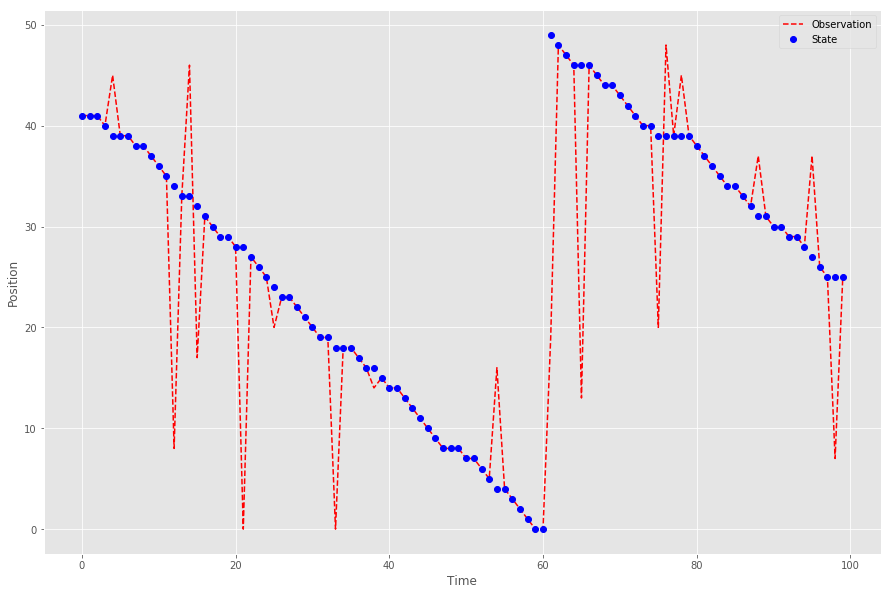

In [18]:
fig = plt.figure(1, figsize=(15, 10))
plt.plot(np.arange(K),obs,'r--',label='Observation')
plt.plot(np.arange(K),state,'bo',label='State')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.show()

<div class="alert alert-info" role="alert">
**Graph interpretation :** After doing to simulation, we can see on this the program miss predicted some true positions. <br>
The red line should have followed the bleu dots all through the image.  <br>

We can also see that it is decreasing, since the robot is moving backward.
</div>

**Question 5 :**

<div class="alert alert-danger">
Implement the Forward-Backward algorithm for computing the quantities defined in 3-a,b,f. (Attention: be
careful with numerical stability! Modify the log-sum-exp trick for this algorithm)
</div>

<div class="alert alert-info" role="alert">
We define the different initializations : 
</div>

In [19]:
K=100
N=50
eps=0.3
w=0.8
current_robot_step=51

<div class="alert alert-info" role="alert">
Now we generate the different matrixs :
</div>

In [20]:
A=matrix_A(N,eps)  
C=matrix_C(N,w)

In [21]:
def forward_backward(A,C,K,N):
    
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
#Initialization for the algorithms :
    
    y,state=simulation(A,C,K) 
    log_alpha=np.zeros([N,K])
    log_alpha_predict=np.zeros([N,K])
    log_beta=np.zeros([N,K])
    log_beta_postdict=np.zeros([N,K])
    prior=np.ones(N)/N
    
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
# Forward :    

    for k in range(K):
        if (k==0):
            log_alpha_predict[:,k]=np.log(prior)
        else:

            log_alpha_predict[:,k]=state_predict(A,log_alpha[:,k-1])

    
        log_alpha[:,k]=state_update(C[int(y[k]),:],log_alpha_predict[:,k])
    
# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------
# Backward :

    for t in range (K-1,-1,-1):    

        if (t==K-1):
            log_beta_postdict[:,t]=np.zeros(N)
        else:
            log_beta_postdict[:,t]=state_postdict(A,log_beta[:,t+1])

        log_beta[:,t]=state_update(C[int(y[t]),:],log_beta_postdict[:,t])

# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------

    return log_alpha,log_alpha_predict,log_beta,log_beta_postdict        

In [22]:
#State prediction :

def state_predict(A,log_p):
    mx=max(log_p)
    p=np.exp(log_p-mx)
    lap=np.log(A.dot(p))+mx
    return lap

In [23]:
#State update :

def state_update(obs,log_p):
    return np.log(obs)+log_p

In [24]:
#State postdict

def state_postdict(A,log_p):
    mx=max(log_p)
    p=np.exp(log_p-mx)
    lap=np.log(A.T.dot(p))+mx
    return lap

<div class="alert alert-info" role="alert">
** Comments : The real question is, why are we using the forward backward algorithm ?**
</div>

<div class="alert alert-info" role="alert">
As explained in the course, this algorithm makes it easier to compute some probabilities that we defined in question 3. 
<br>
<br>
  ** -  The Distribution of the robot's current position given the observations so far:**  <br>
<br>
$P(X_k|Y_{1:k})= \frac{P(X_k,Y_{1:k})}{P(Y_{1:k})}=\frac{P(X_k,Y_{1:k})}{\sum\nolimits_{X_k}P(X_k,Y_{1:k})}=\frac{\alpha_{k,k}(X_k)}{\sum\limits_{i=1}^k \alpha_{k,k}(X_k) } $
<br>

** -  The Distribution of the robot's position at time step k given all the observations :** <br>
<br>
$P(X_k|Y_{1:K})= \frac{P(X_k,Y_{1:K})}{P(Y_{1:K})} $ <br>
<br>

On the other hand, we have :   $P(X_k,Y_{1:K})=P(X_k,Y_{1:k}).P(Y_{k+1:K}|X_k,,Y_{1:k})=P(X_k,Y_{1:k}).P(Y_{k+1:K}|X_k)$  <br>   
since   $y_{k+1:K} \coprod y_{1:k} | X_{k}  $ <br> <br>

Then,  $P(X_k,Y_{1:K})=P(X_k,Y_{1:k}).P(Y_{k+1:K}|X_k)=\alpha_{k/k}(x_k).\beta_{k/k+1}(x_k)=\gamma_{k,k}(X_k) $

<br> <br>

And finally, we get : $P(X_k|Y_{1:K})=\frac{\gamma_{k,k}(X_k)}{\sum\nolimits_{X_k} \gamma_{k,k}(X_k) } $
<br>
<br>

** -  The most likely current position of the robot given the observations so far :** <br>
<br>
MostLikely_pos= $\arg\max_{X_k} P(X_k|Y_{1:k})$<br>

</div>

In [25]:
def calcul_prob(A,C,K,N,current_robot_step):

#   Generating the forward_backward algorithm :
    log_alpha,log_alpha_predict,log_beta,log_beta_postdict=forward_backward(A,C,K,N)
    
#    Distribution of the robot's current position given the observations so far :
    p3a=np.exp(log_alpha[:,current_robot_step-1])/((np.exp(log_alpha[:,:current_robot_step])).sum(axis=1))
    
#    Distribution of the robot's position at time step k given all the observations :
    log_gamma=log_alpha+log_beta_postdict
    p3b=np.exp(log_gamma[:,current_robot_step])/((np.exp(log_gamma)).sum(axis=1))
    
#    Most likely current position of the robot given the observations so far :
    most_likely_pos=np.argmax(p3a)+1
    
    return p3a,p3b,most_likely_pos

In [26]:
log_alpha,log_alpha_predict,log_beta,log_beta_postdict=forward_backward(A,C,K,N)
p3a,p3b,most_likely_pos=calcul_prob(A,C,K,N,current_robot_step)

In [27]:
print('************************************************************************\n')
print ("Current state, k = "+str(current_robot_step+1))
print("the most likely current position of the robot given the observations is : ")
print(most_likely_pos)
print('\n************************************************************************')

************************************************************************

Current state, k = 52
the most likely current position of the robot given the observations is : 
13

************************************************************************


**Question 6 :**

<div class="alert alert-danger" role="alert">
Assume now that at each step the robot can be kidnapped with probability κ. If the robot is kidnapped its new
position is independent from its previous position and is uniformly distributed. Repeat 4 and 5 for this new
model with κ = 0.1. Can you reuse your code?
</div>

<div class="alert alert-info" role="alert">
For this question, a probability k is introduced as the probability that the robot gets kidnapped at each step t

</br>

The transition model is $x_k \sim p(x_k |x_{k-1})$ will change . It will become <br>
$$\quad
P(X_{t+1}|X_{t})=
\begin{bmatrix} 
(1-k).\epsilon+\frac{k}{N} & (1-k).(1-\epsilon)+\frac{k}{N} & \frac{k}{N} & . & . & . & (1-k)(1-\epsilon)+\frac{k}{N} \\
 \frac{k}{N} & (1-k).\epsilon+\frac{k}{N} & (1-k).(1-\epsilon)+\frac{k}{N} & . & . & \frac{k}{N} \\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
(1-k).(1-\epsilon)+\frac{k}{N} & . &.&.&\frac{k}{N}& \frac{k}{N} &(1-k).\epsilon+\frac{k}{N}
\end{bmatrix}$$=$$\quad
P(X_{t+1}|X_{t})=(1-k)*
\begin{bmatrix} 
\epsilon & 0 & 0 & . & . & . & 1-\epsilon \\
1-\epsilon & \epsilon & 0 & . & . & . & 0 \\
0 & 1-\epsilon & \epsilon & 0 & . & . & 0 \\
0 & 0 &1-\epsilon & \epsilon  & . & . & 0\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
0 & . &.&.&0&1-\epsilon&\epsilon
\end{bmatrix}+\frac{k}{N}*\begin{bmatrix} 
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
1 & 1 & 1 & . & . & . & 1 \\
\end{bmatrix}
$$
<br>
<br>

The observation model  $y_k \sim p(y_k |x_{k})$  remains the same.
$$P(Y_{t}|X_{t})=\omega* I_N +\frac{1-\omega}{N}*u_N  $$
</br>
</div>

<div class="alert alert-info" role="alert">
**Explanation :** If the robot gets not kidnapped, we find our selfs in the 'normal' case, which was explained in the 2nd question.
On the other hand, if the robot gets kidnapped with probability k, and since we have N states, the robot can change his state with probability $\frac{1}{N}$.
</div>

<div class="alert alert-info" role="alert">
**Conclusion : WE CAN STILL USE THE SAME CODE, WE JUST NEED TO CHANGE THE TRANSITION MATRIX A, LIKE EXPLAINED ABOVE.**
</div>

In [28]:
def matrix_A_kinnaped(N,eps,k):
    A=matrix_A(N,eps)
    return (1-k)*A+(k)/N*np.full((N,N), 1)
        
def matrix_C_kinnaped(N,w):
    return w*np.eye(N)+(1-w)/N*np.full((N,N), 1)

**Different initializations that will be needed :**

In [29]:
K=100
N=50
current_step=51
eps=0.3
w=0.8
prob_k=0.1

**Model's matrixs :**

In [30]:
A_kinnaped=matrix_A_kinnaped(N,eps,prob_k)
C_kinnaped=matrix_C_kinnaped(N,w)

In [31]:
obs,state=simulation(A_kinnaped,C_kinnaped,K)
for i in range(K):
    print("Step number : "+str(i+1))
    print('\nTrue position :'+str(state[i]))
    print('Observed position :'+str(int(obs[i])))
    print('\n************************************************************************\n')

Step number : 1

True position :17
Observed position :26

************************************************************************

Step number : 2

True position :17
Observed position :30

************************************************************************

Step number : 3

True position :16
Observed position :16

************************************************************************

Step number : 4

True position :15
Observed position :19

************************************************************************

Step number : 5

True position :14
Observed position :9

************************************************************************

Step number : 6

True position :13
Observed position :13

************************************************************************

Step number : 7

True position :13
Observed position :13

************************************************************************

Step number : 8

True position :12
Observed position :12

*******************

In [32]:
log_alpha,log_alpha_predict,log_beta,log_beta_postdict=forward_backward(A_kinnaped,C_kinnaped,K,N)
p3a,p3b,most_likely_pos=calcul_prob(A_kinnaped,C_kinnaped,K,N,current_step)
print('************************************************************************\n')
print ("Step number k ="+str(current_step+1))
print("the most likely current position of the robot given the observations so far is")
print(most_likely_pos)

print('\n************************************************************************')

************************************************************************

Step number k =52
the most likely current position of the robot given the observations so far is
2

************************************************************************


<div class="alert alert-info" role="alert">
**Error rate, Kidnaped version :**
</div>

In [33]:
errors_count2 = state - obs
errors2 = 0
for i in range(K):
    if (errors_count2[i] != 0):
        errors2 = errors2 + 1

In [34]:
print('The error rate for this simulation ( With kidnapping ) is : '+ str((errors2*100/K)) +'%')

The error rate for this simulation ( With kidnapping ) is : 13.0%


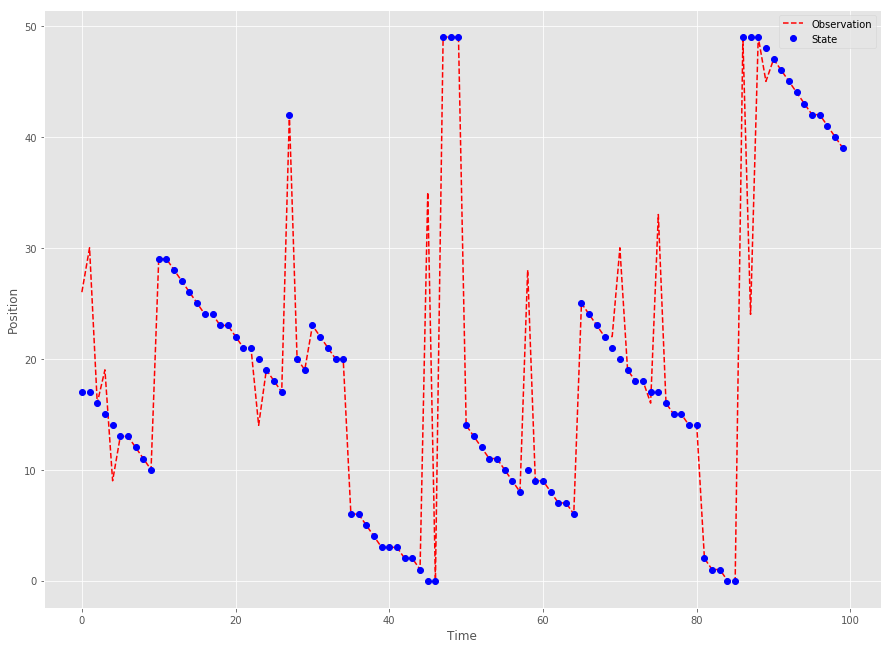

In [35]:
fig = plt.figure(1, figsize=(15, 11))
plt.plot(np.arange(K),obs,'r--',label='Observation')
plt.plot(np.arange(K),state,'bo',label='State')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.show()

<div class="alert alert-info" role="alert">
**Graph interpretation :** After doing to simulation, we can see on this the program miss predicted some true positions also. <br>

We can also notice the jumps that the robot made with probability equal to k, and thus, we do not have a monotonic decreasing graph like on the 4th question example. 

</div>